# Unveiling the Secrets of Wine Quality

Bypassing traditional tasting methods, this project employs data analysis to predict the quality of wine based on its chemical features.

## 🍷 1. Introduction about the Data Set

### 📖 1.1 General Information:
- **Provided by**: [The UCI Machine Learning Repository](http://archive.ics.uci.edu/dataset/109/wine).
- **Donated by**: Paulo Cortez, Antonio Cerdeira, Fernando Almeida, Telmo Matos, and Jose Reis.
   - 📜 **Their paper**: [Modeling wine preferences by data mining from physicochemical properties](https://repositorium.sdum.uminho.pt/bitstream/1822/10029/1/wine5.pdf).
   - 🧐 **Main idea**: Using data mining to understand how various factors influence wine quality, offering insights into wine production and certification. 
   - ⚒️ **Approach**: Support Vector Machines (SVM), Neural Networks (NN), and Multiple Regression (MR) techniques.
   - 🧰 **Conclusion**: 
     - For assessing wine quality, the Support Vector Machine (SVM) method outperforms other techniques in accuracy, especially for white wines.
     - Alcohol level is a key factor in determining wine quality. Citric acid and residual sugar are more significant in white wines, whereas sulphates are highly important in both types.

### 🍇 1.2 Info about the Wine:
- **Types**: Both white and red wines from the Vinho Verde region in northwestern Portugal 🇵🇹.
- **Production**: Represents 15% of Portuguese production.

### 📊 1.3 Info about the Datasets:
- **Wines**: 1599 red and 4898 white samples.
- **Collection**:
   - ⏳ Timeframe: May 2004 to February 2007.
   - 🏷️ Type: Only protected designation of origin samples by CVRVV (Comissão de Viticultura da Região dos Vinhos Verdes), focused on enhancing the quality and marketing of vinho verde.
- **Quality Assessment**:
   - Rated by at least three sensory assessors (blind tastes), on a 0 (very bad) to 10 (excellent) scale. The final score is the median of these ratings.
- **Chemical Features Tested**:
   - 🧪 Data recorded by iLab, a computerized system managing wine sample testing.
   - Tests include density, alcohol, pH values, etc.
- **Limitation**:
  - Lack of Temporal Information:
    - We are unable to analyze variations in wine quality across different years, also making it impossible for us to identify the relationship between weather conditions and wine quality.
  - Lack of Brand and Public Preference Data: 
    - We are unable to establish a direct link between wine quality attributes and consumer preferences or sales performance. 

## 2. Research Questions and Motivations

### 2.1 Research Questions
Our reserach questions enhances and expands upon prior studies by:
- 🎯 **Focusing on Classification**: Utilizing advanced models like logistic regression and Random Forest for classifying wine quality tiers, assessing their accuracy, and pinpointing crucial quality influencers.
  
- 🛠️ **Model Comparison Pipeline**: Developing a systematic pipeline to contrast various models. This includes tuning hyperparameters and evaluating performance scores.
- 🍇 **Quality Wine Recipes**: Crafting formulas for both **top-quality** and **poor-quality wines**. These models aim to avert the production of low-quality wines and spotlight the unique attributes of top-tier wines.
- 🔍 **Deep Dive with PCA**: Investigating nuances in high-rated wines and applying Principal Component Analysis (PCA) for a more thorough exploration, surpassing traditional data mining approaches.


### 2.2 Motivations:
- 🇫🇷 **Cultural Significance**: Residing in France, a nation celebrated for its wine tradition, we seek to deepen our understanding of wine. This analysisfosters a greater appreciation of this heritage.
  
- 📊 **Analytical Depth:** Leveraging data-driven methods to explore wine quality nuances. This exploration will enhance our analytical skills while shedding light on hidden characteristics within wines.
- 🍾 **Enhancing Wine Production:** Providing actionable insights for quality improvement through advanced statistical and machine learning techniques.

## 3. Data Analysis

In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore

### 3.1 Extract Data: Reading from CSV Files

In [41]:
# These csv files are downloaded from the UCI website.

df_white_wine = pd.read_csv("data/winequality-white.csv", sep=";")

df_red_wine = pd.read_csv("data/winequality-red.csv",sep=";")

df_red_wine
df_white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
df_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df_red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 3.2 Clean Data

#### 3.2.1 Check for missing values

We are going to check if there are empty values.

In [6]:
df_red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df_white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
df_red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df_red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Observations from Checking Missing Values:**
1. There are no missing data in either dataset.
2. All feature columns are of the float type, and the target column is an integer.

#### 3.2.2 Outlier Analysis

In [10]:
df_white_wine.wine_type = "White Wine"
df_red_wine.wine_type = "Red Wine"

def get_wine_str(wine_type_df):
    return getattr(wine_type_df, 'wine_type', "Unknown Wine")

We will create box plots to understand the outliers.

In [50]:
def create_box_plot(wine_type_df):
    feature_columns = wine_type_df.drop(columns=['quality']).columns.tolist()
    # Set up the matplotlib figure and axes for a 3x3 grid
    fig, axs = plt.subplots(3, 4, figsize=(20, 15))  # Adjust the size as needed

    # Flatten the array of axes to make it easier to iterate over
    axs = axs.flatten()

    for i, column in enumerate(feature_columns): 
        sns.boxplot(x='quality', y=column, hue='quality', data=wine_type_df, ax=axs[i], palette="pastel", legend=False)

    plt.show()

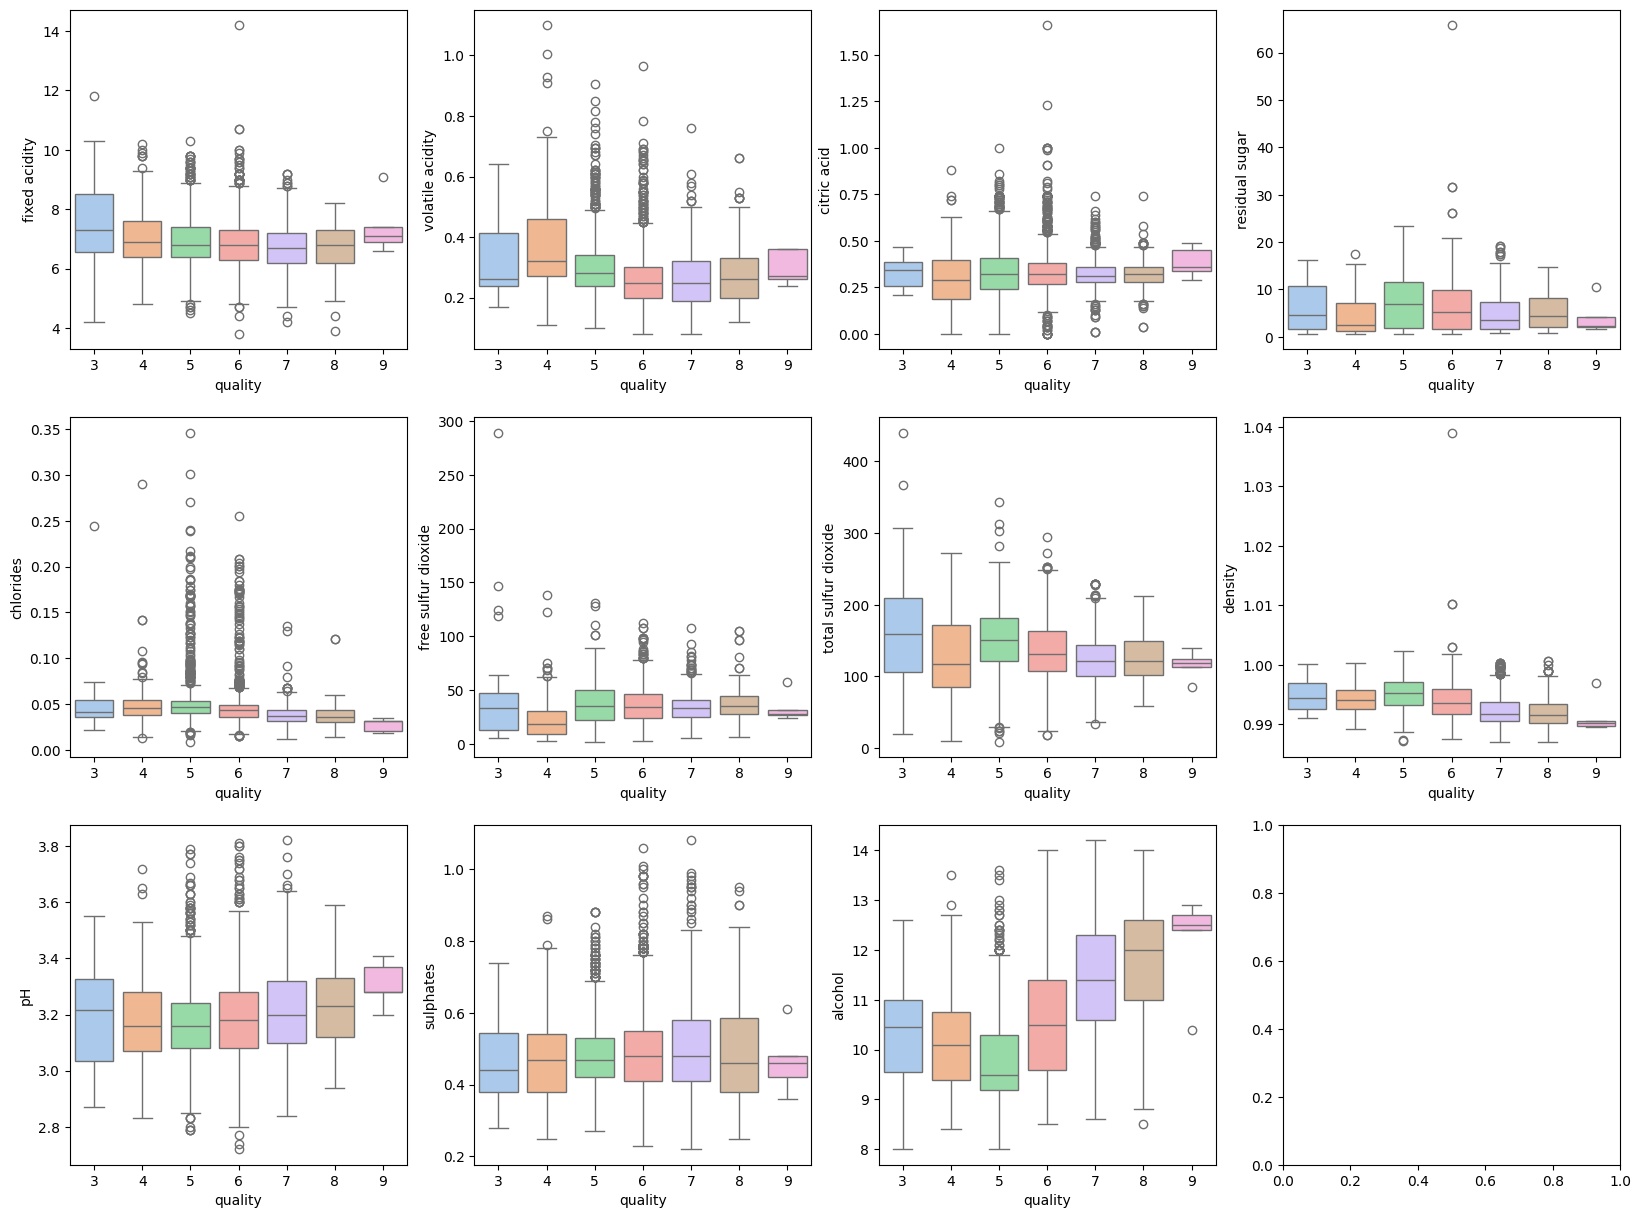

In [51]:
create_box_plot(df_white_wine)

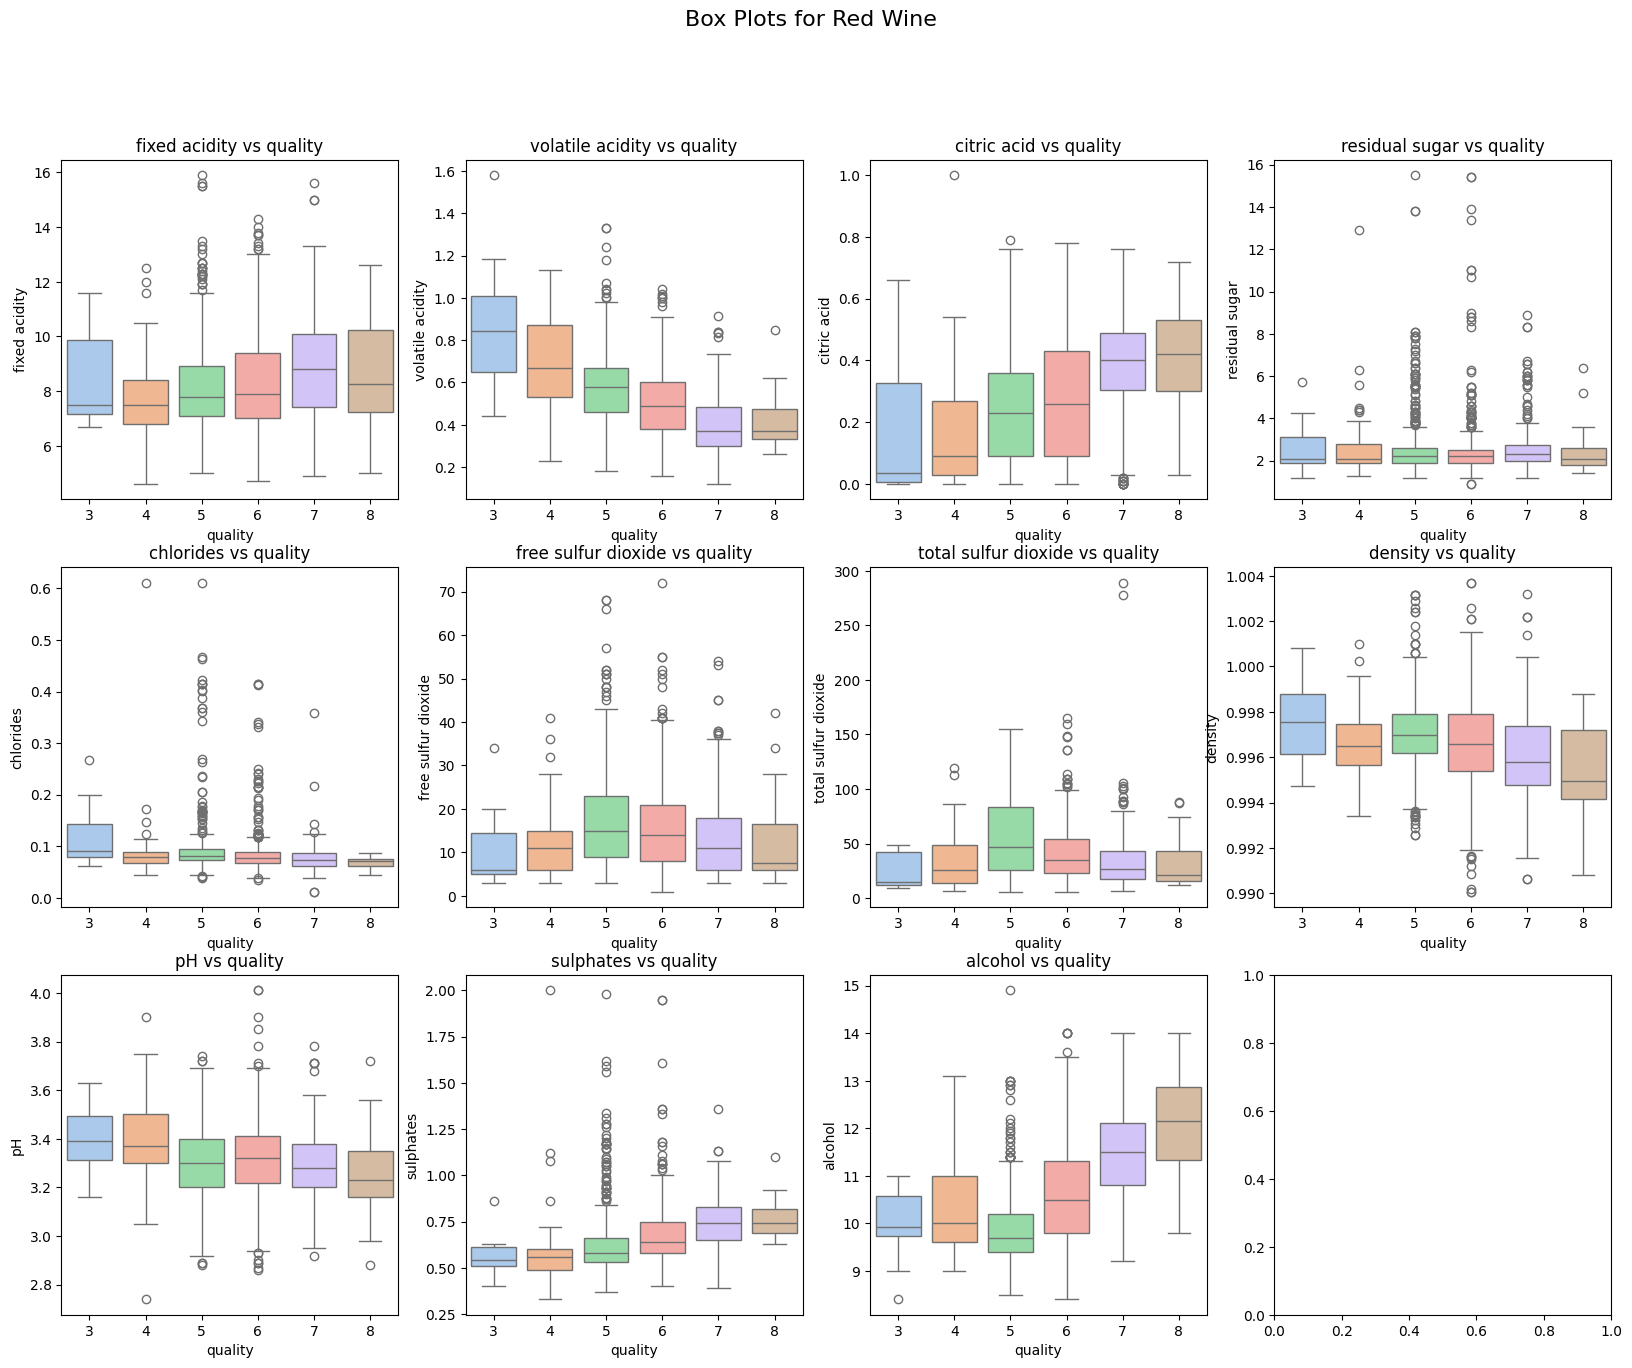

In [13]:
create_box_plot(df_red_wine)

**Observations from Box Plots**
1. It's hard to decide should we delete outliers or not based on these plots. 
2. We will continue to draw QQ plots and calculate the Z-score to see the outliers out of 99.7% confidence interval.

In [37]:
def calculate_z_score(wine_type_df):
    z_scores_df = wine_type_df.copy()

    print(f"Z Score of {get_wine_str(wine_type_df)}:\n")

    for col in wine_type_df.columns:
        if col != 'quality':
            z_scores_df[col + ' Z-score'] = zscore(wine_type_df[col])
            
            outliers = abs(z_scores_df[col + ' Z-score']) > 3
            print(f"Outliers in {col}: {outliers.sum()}")
    
    return z_scores_df


In [15]:
z_score_red_wine = calculate_z_score(df_red_wine)

Z Score of Red Wine:

Outliers in fixed acidity: 12
Outliers in volatile acidity: 10
Outliers in citric acid: 1
Outliers in residual sugar: 30
Outliers in chlorides: 31
Outliers in free sulfur dioxide: 22
Outliers in total sulfur dioxide: 15
Outliers in density: 18
Outliers in pH: 8
Outliers in sulphates: 27
Outliers in alcohol: 8


In [16]:
z_score_white_wine = calculate_z_score(df_white_wine)

Z Score of White Wine:

Outliers in fixed acidity: 46
Outliers in volatile acidity: 81
Outliers in citric acid: 85
Outliers in residual sugar: 9
Outliers in chlorides: 102
Outliers in free sulfur dioxide: 32
Outliers in total sulfur dioxide: 12
Outliers in density: 3
Outliers in pH: 32
Outliers in sulphates: 48
Outliers in alcohol: 0


**Observations from Z Score**
1. **Red Wine**:
   1. Few outliers overall.
   2. Residual sugar(30), chlorides(31), and sulphates(27) show a moderate number of outliers.
2. **White Wine**: 
   1. More outliers overall.
   2. Chlorides(102), citric acid(85), and volatile acidity(81) show a high number of outliers.
3. We will decide wheter we keep or delete outliers when building the prediction model.


Here we want to create QQ Plots to understand if the features follow normal distribution or not.

In [17]:
## Q-Q 
# boxplot - log scale 

def create_qq_plot(wine_type_df):
    wine_type = get_wine_str(wine_type_df)

    # Select only the numerical columns from the DataFrame
    numerical_columns = wine_type_df.select_dtypes(include=[np.number]).columns

    # Set up the matplotlib figure and axes for a 3x3 grid
    fig, axs = plt.subplots(3, 4, figsize=(20, 15))  # Adjust the size as needed

    # Flatten the array of axes to make it easier to iterate over
    axs = axs.flatten()

    # Loop over the numerical columns and create a Q-Q plot for each
    for i, column in enumerate(numerical_columns):  
        data = wine_type_df[column]
        stats.probplot(data, dist="norm", plot=axs[i])

    # Adjust layout to prevent overlap
    fig.suptitle(f"QQ Plots for {wine_type}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

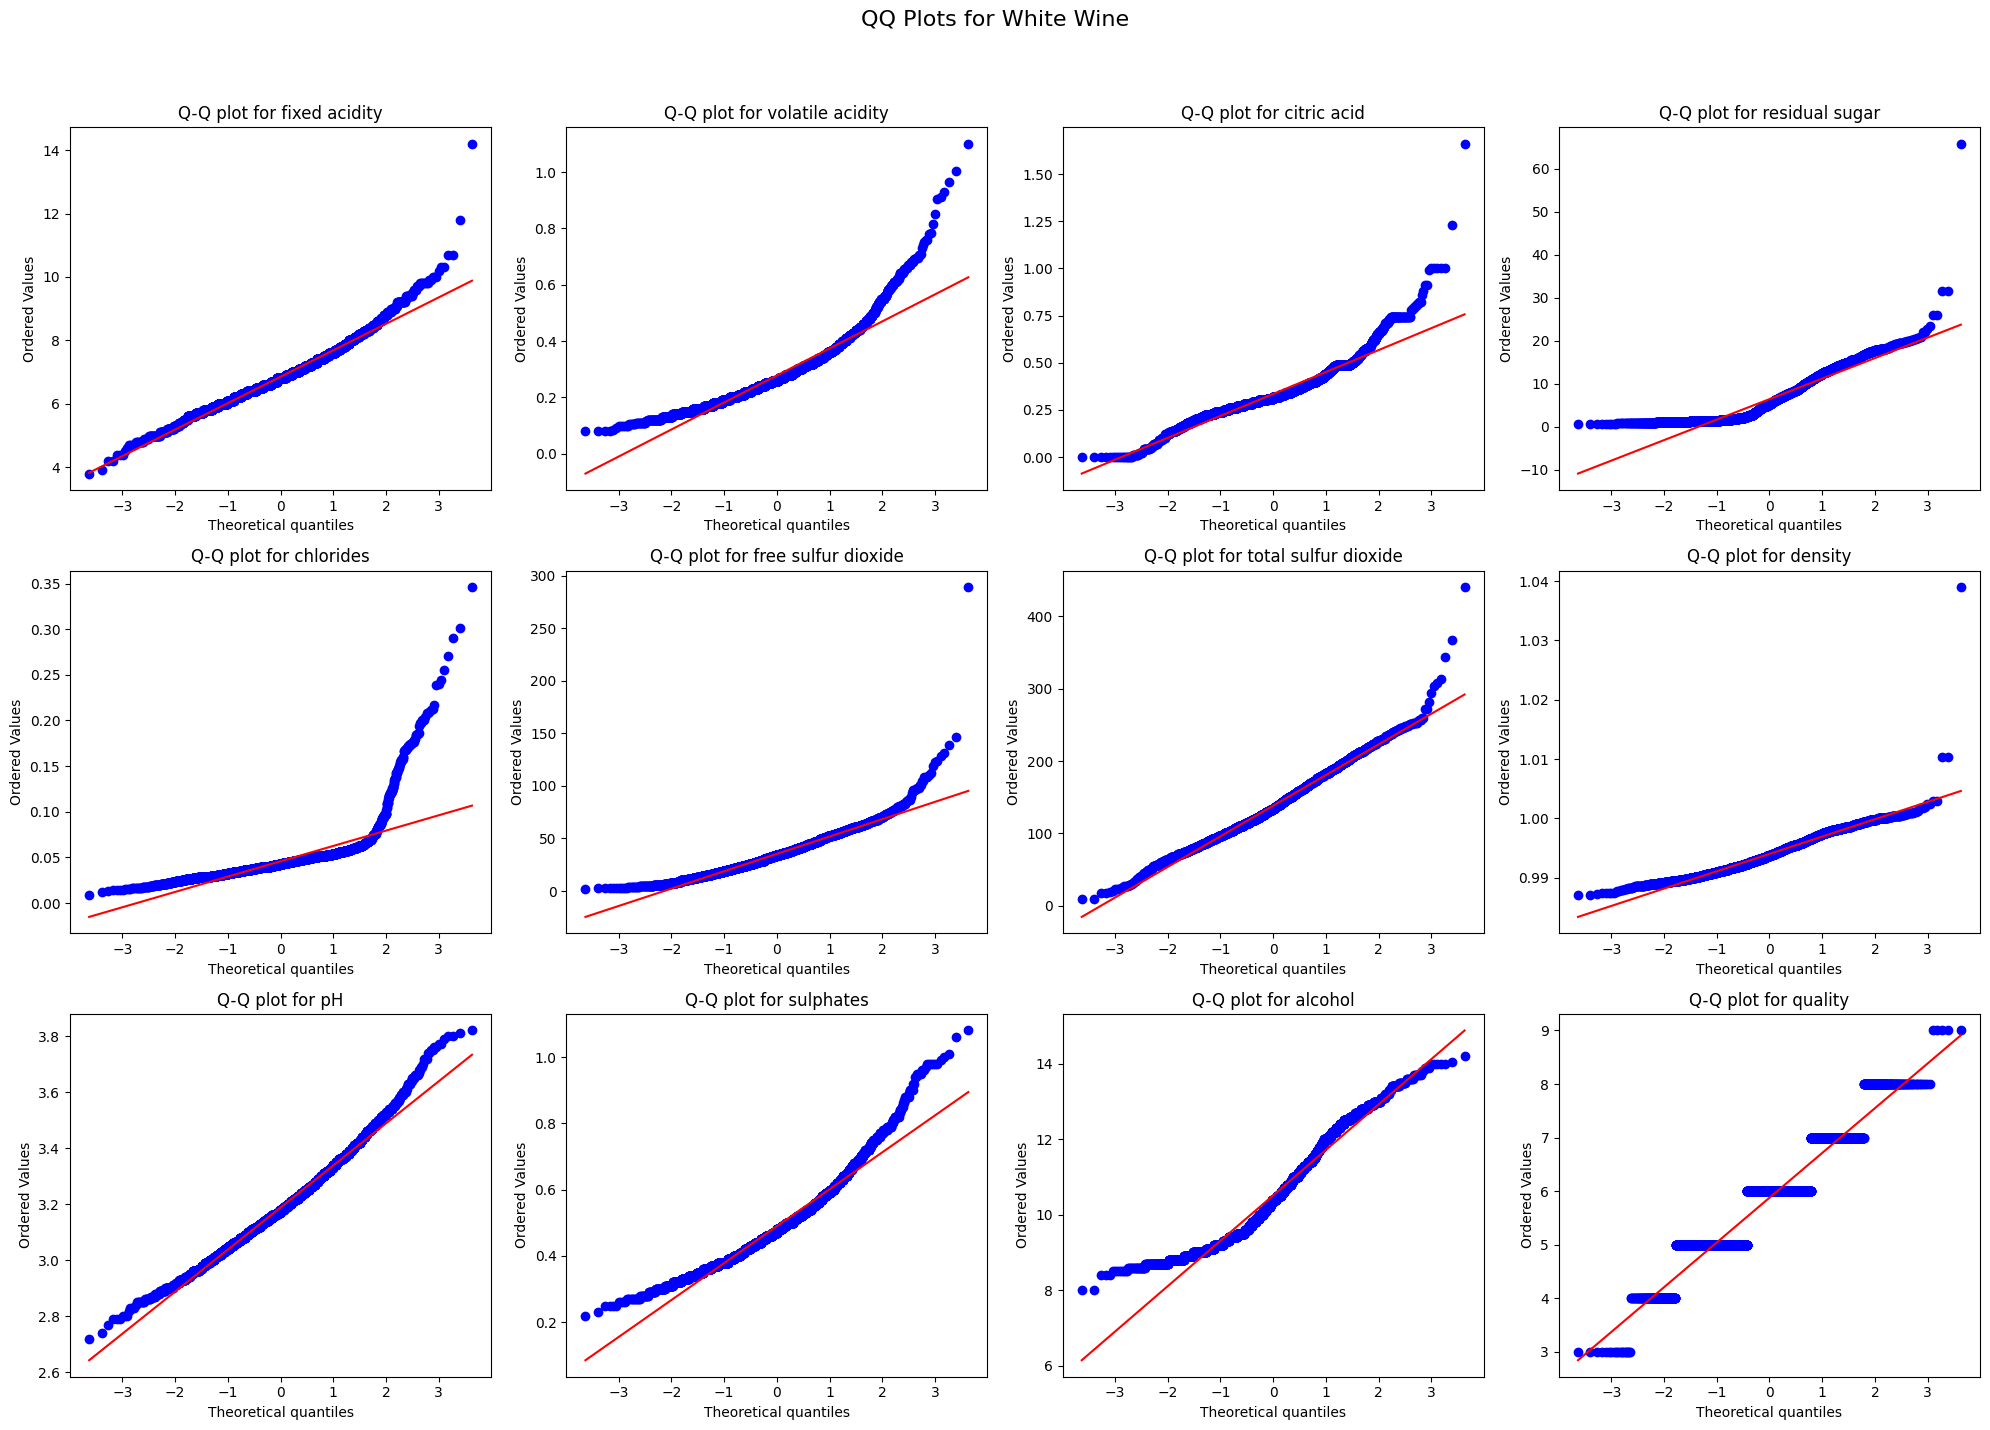

In [18]:
create_qq_plot(df_white_wine)

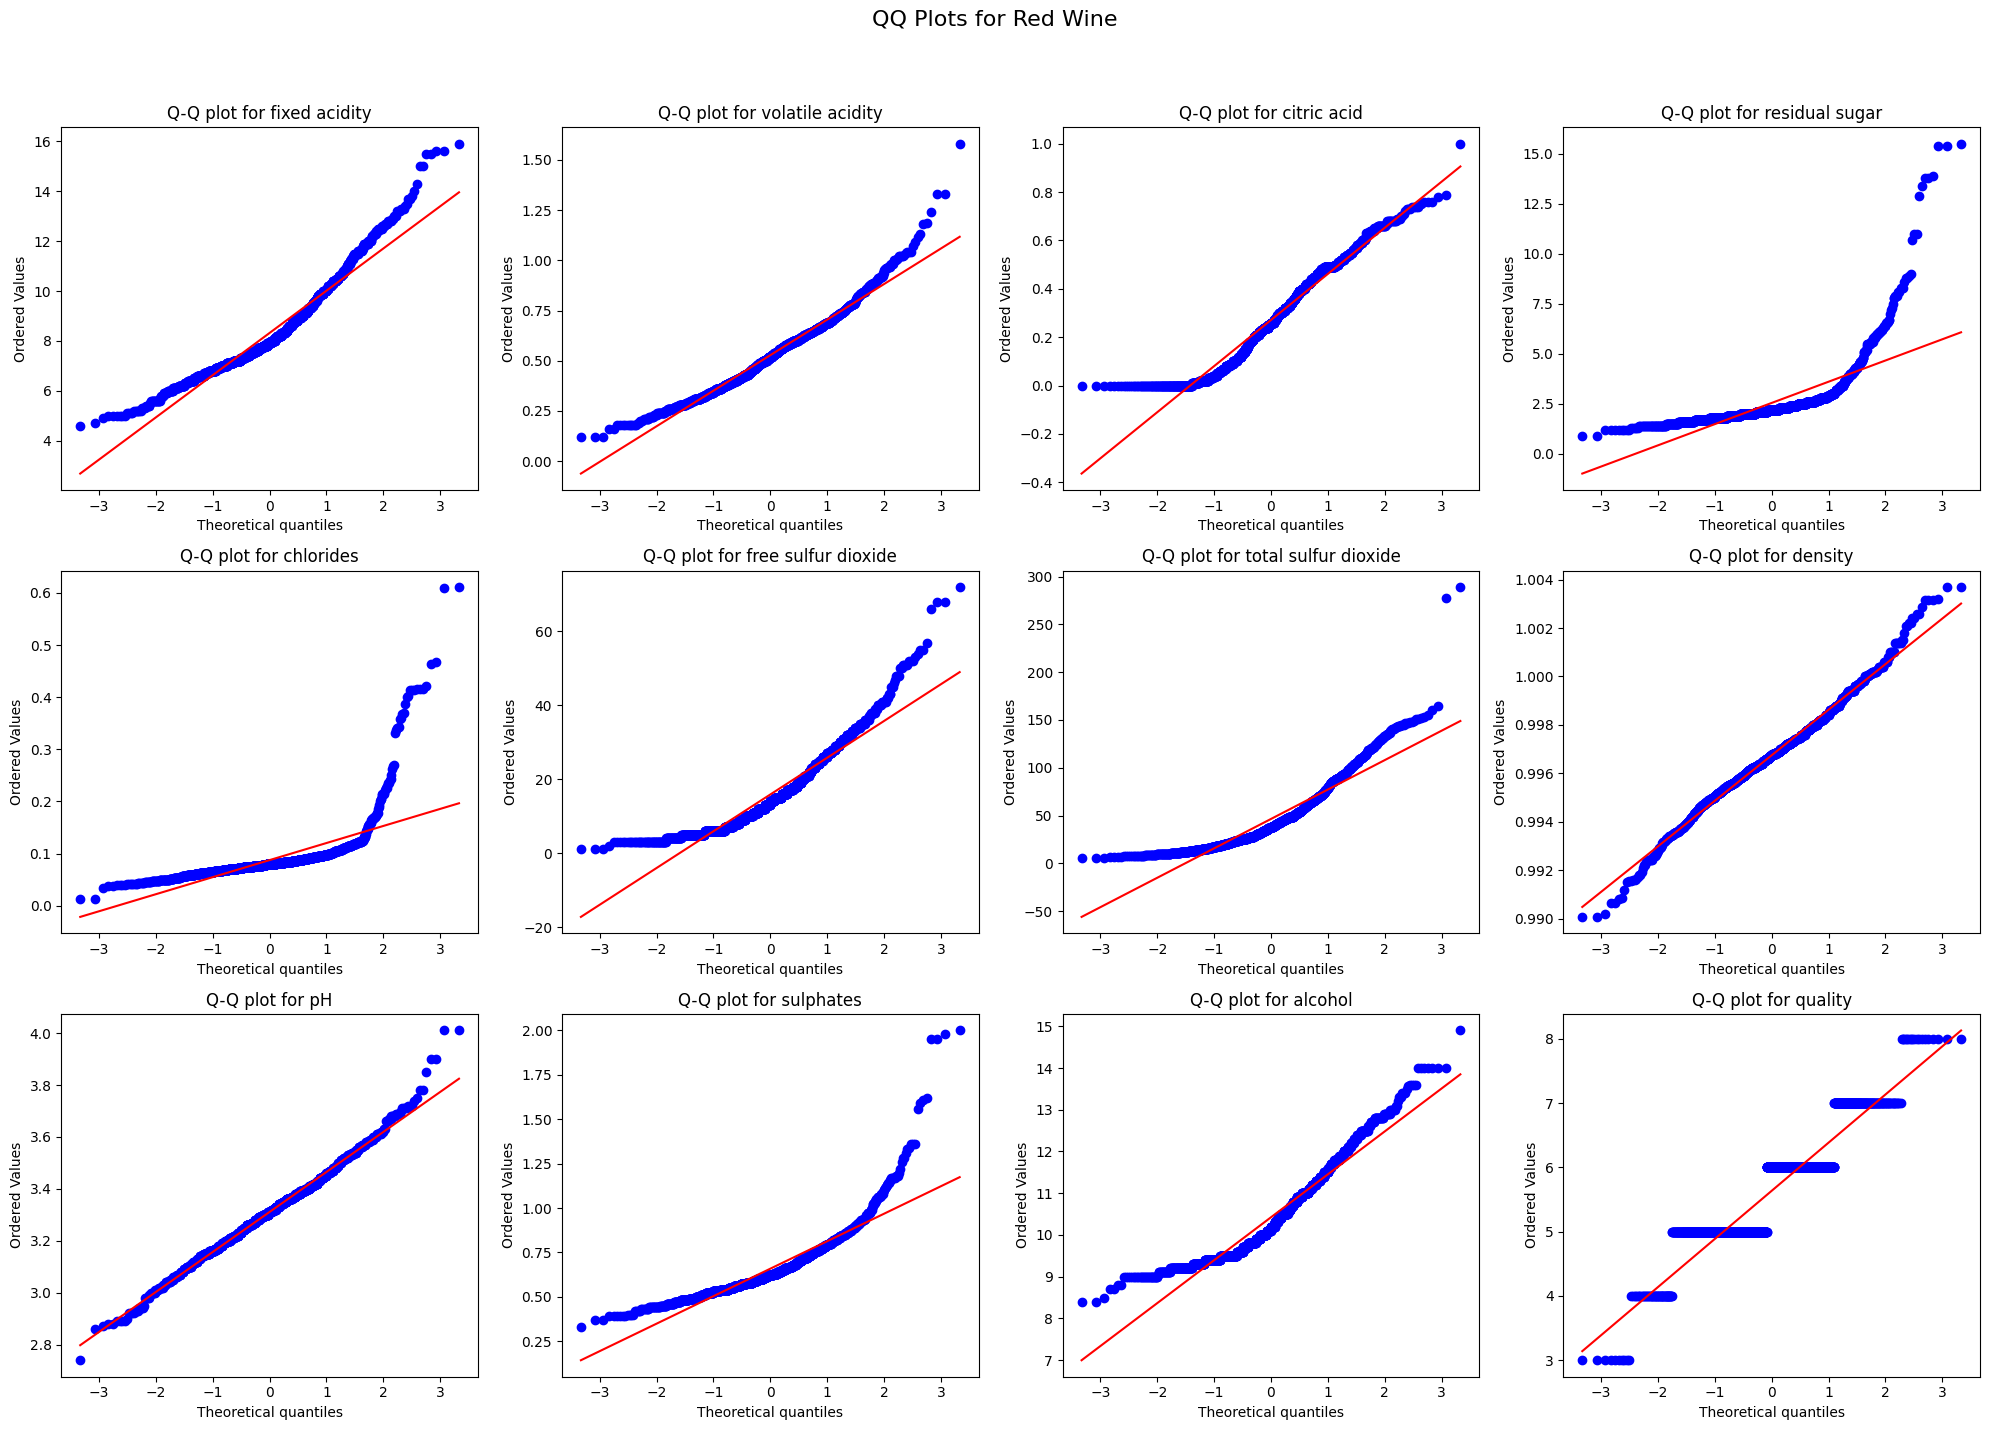

In [19]:
create_qq_plot(df_red_wine)

### Observations from QQ Plots of Red and White Wine Datasets:

1. **Right Skewness**:
   - **Red Wine**: `Residual Sugar` and `Alcohol` show deviations in the lower quantiles.
   - **White Wine**: Similar to Red Wine, `Residual Sugar` and `Alcohol` show deviations in the lower quantiles.

2. **Left Skewness**:
   - **Red Wine**: `Free Sulfur Dioxide`, `Chlorides`, and `Sulphates` show deviations in the upper quantiles.
   - **White Wine**: `Volatile Acidity`, `Chlorides`, and `Sulphates` show deviations in the upper quantiles.

3. **Implications for Data Processing**:
   - The observed skewness in both datasets suggests the need for normalization transformations. We will continue to calculate skewness coefficient. 
   - Techniques like logarithmic or Box-Cox transformations may be beneficial to address these deviations and improve the homogeneity of the data.

In [20]:
def calculate_skewness_coefficient(wine_type_df):
    print(f"The skewness coefficient of {get_wine_str(wine_type_df)}:\n")

    for column in wine_type_df.columns:  
        skewness = round(wine_type_df[column].skew(),2)
        print(f"{column}: {skewness}")


In [21]:
calculate_skewness_coefficient(df_white_wine)

The skewness coefficient of White Wine:

fixed acidity: 0.65
volatile acidity: 1.58
citric acid: 1.28
residual sugar: 1.08
chlorides: 5.02
free sulfur dioxide: 1.41
total sulfur dioxide: 0.39
density: 0.98
pH: 0.46
sulphates: 0.98
alcohol: 0.49
quality: 0.16


In [22]:
calculate_skewness_coefficient(df_red_wine)

The skewness coefficient of Red Wine:

fixed acidity: 0.98
volatile acidity: 0.67
citric acid: 0.32
residual sugar: 4.54
chlorides: 5.68
free sulfur dioxide: 1.25
total sulfur dioxide: 1.52
density: 0.07
pH: 0.19
sulphates: 2.43
alcohol: 0.86
quality: 0.22


**Observations from the skewness coefficient**

1. **White Wine**:
   - Chlorides (5.02): Highly skewness. 
   - Volatile Acidity (1.58), Citric Acid (1.28), Residual Sugar (1.08), Free Sulfur Dioxide (1.41): : Moderate skewness.
2. **Red Wine**:
   - Residual Sugar (4.54) and Chlorides (5.68): Highly skewness
   - Free Sulfur Dioxide (1.25), Total Sulfur Dioxide (1.52), Sulphates (2.43): Moderate skewness.

We are going to develop separate QQ plots for wines classified into different quality categories: bad(3-4), middle(5-6-7), and good(8-9) to better understand our outliers.

In [53]:
bin_edges = [2, 4, 7, 10]
bin_labels = ['poor', 'middle', 'good']
df_white_wine['quality_category'] = pd.cut(df_white_wine['quality'], bins=bin_edges, labels=bin_labels)
df_red_wine['quality_category'] = pd.cut(df_red_wine['quality'], bins=bin_edges, labels=bin_labels)

df_white_wine
df_red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,middle
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,middle
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,middle
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,middle
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,middle
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,middle
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,middle
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,middle


We are going to do log transformation for features of highly skewness and moderate skewness.

In [38]:
white_wine_log_columns = [
    'chlorides',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'free sulfur dioxide'
]

red_wine_log_columns = [
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'sulphates'
]

In [47]:
log_red_wine_df = df_red_wine.copy()
log_white_wine_df = df_white_wine.copy()

log_red_wine_df[red_wine_log_columns] = np.log(log_red_wine_df[red_wine_log_columns] + 0.001)
log_white_wine_df[white_wine_log_columns] = np.log(log_white_wine_df[white_wine_log_columns]+ 0.001)

log_red_wine_df.wine_type = "Red Wine(Log)"
log_white_wine_df.wine_type = "White Wine(Log)"

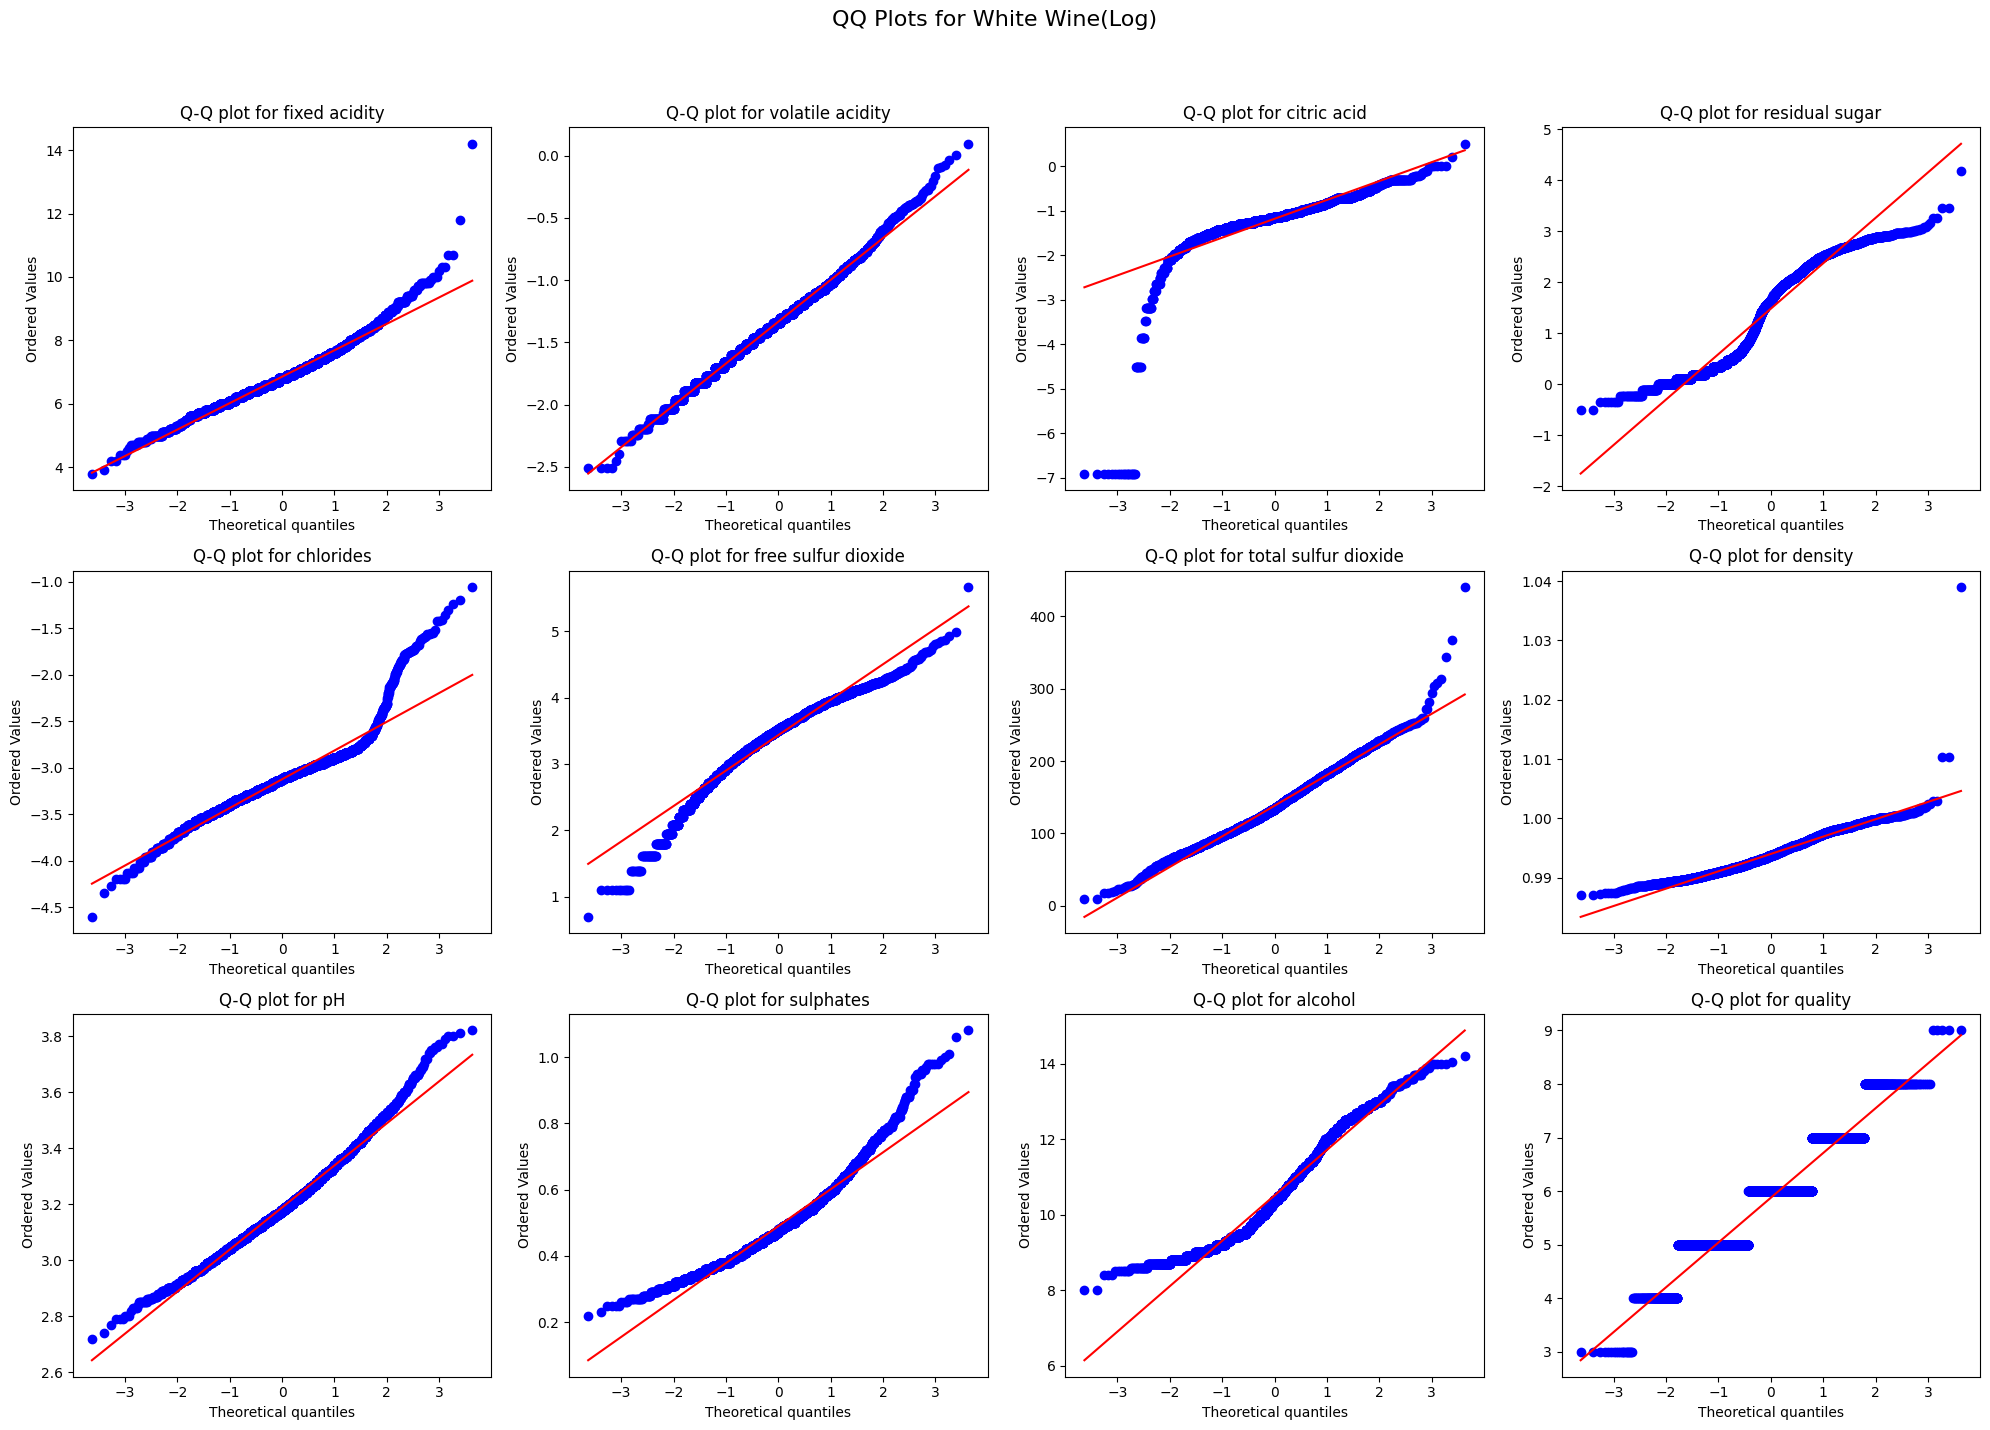

The skewness coefficient of White Wine(Log):

fixed acidity: 0.65
volatile acidity: 0.14
citric acid: -5.56
residual sugar: -0.16
chlorides: 1.19
free sulfur dioxide: -0.94
total sulfur dioxide: 0.39
density: 0.98
pH: 0.46
sulphates: 0.98
alcohol: 0.49
quality: 0.16


In [49]:
create_qq_plot(log_white_wine_df)
calculate_skewness_coefficient(log_white_wine_df)

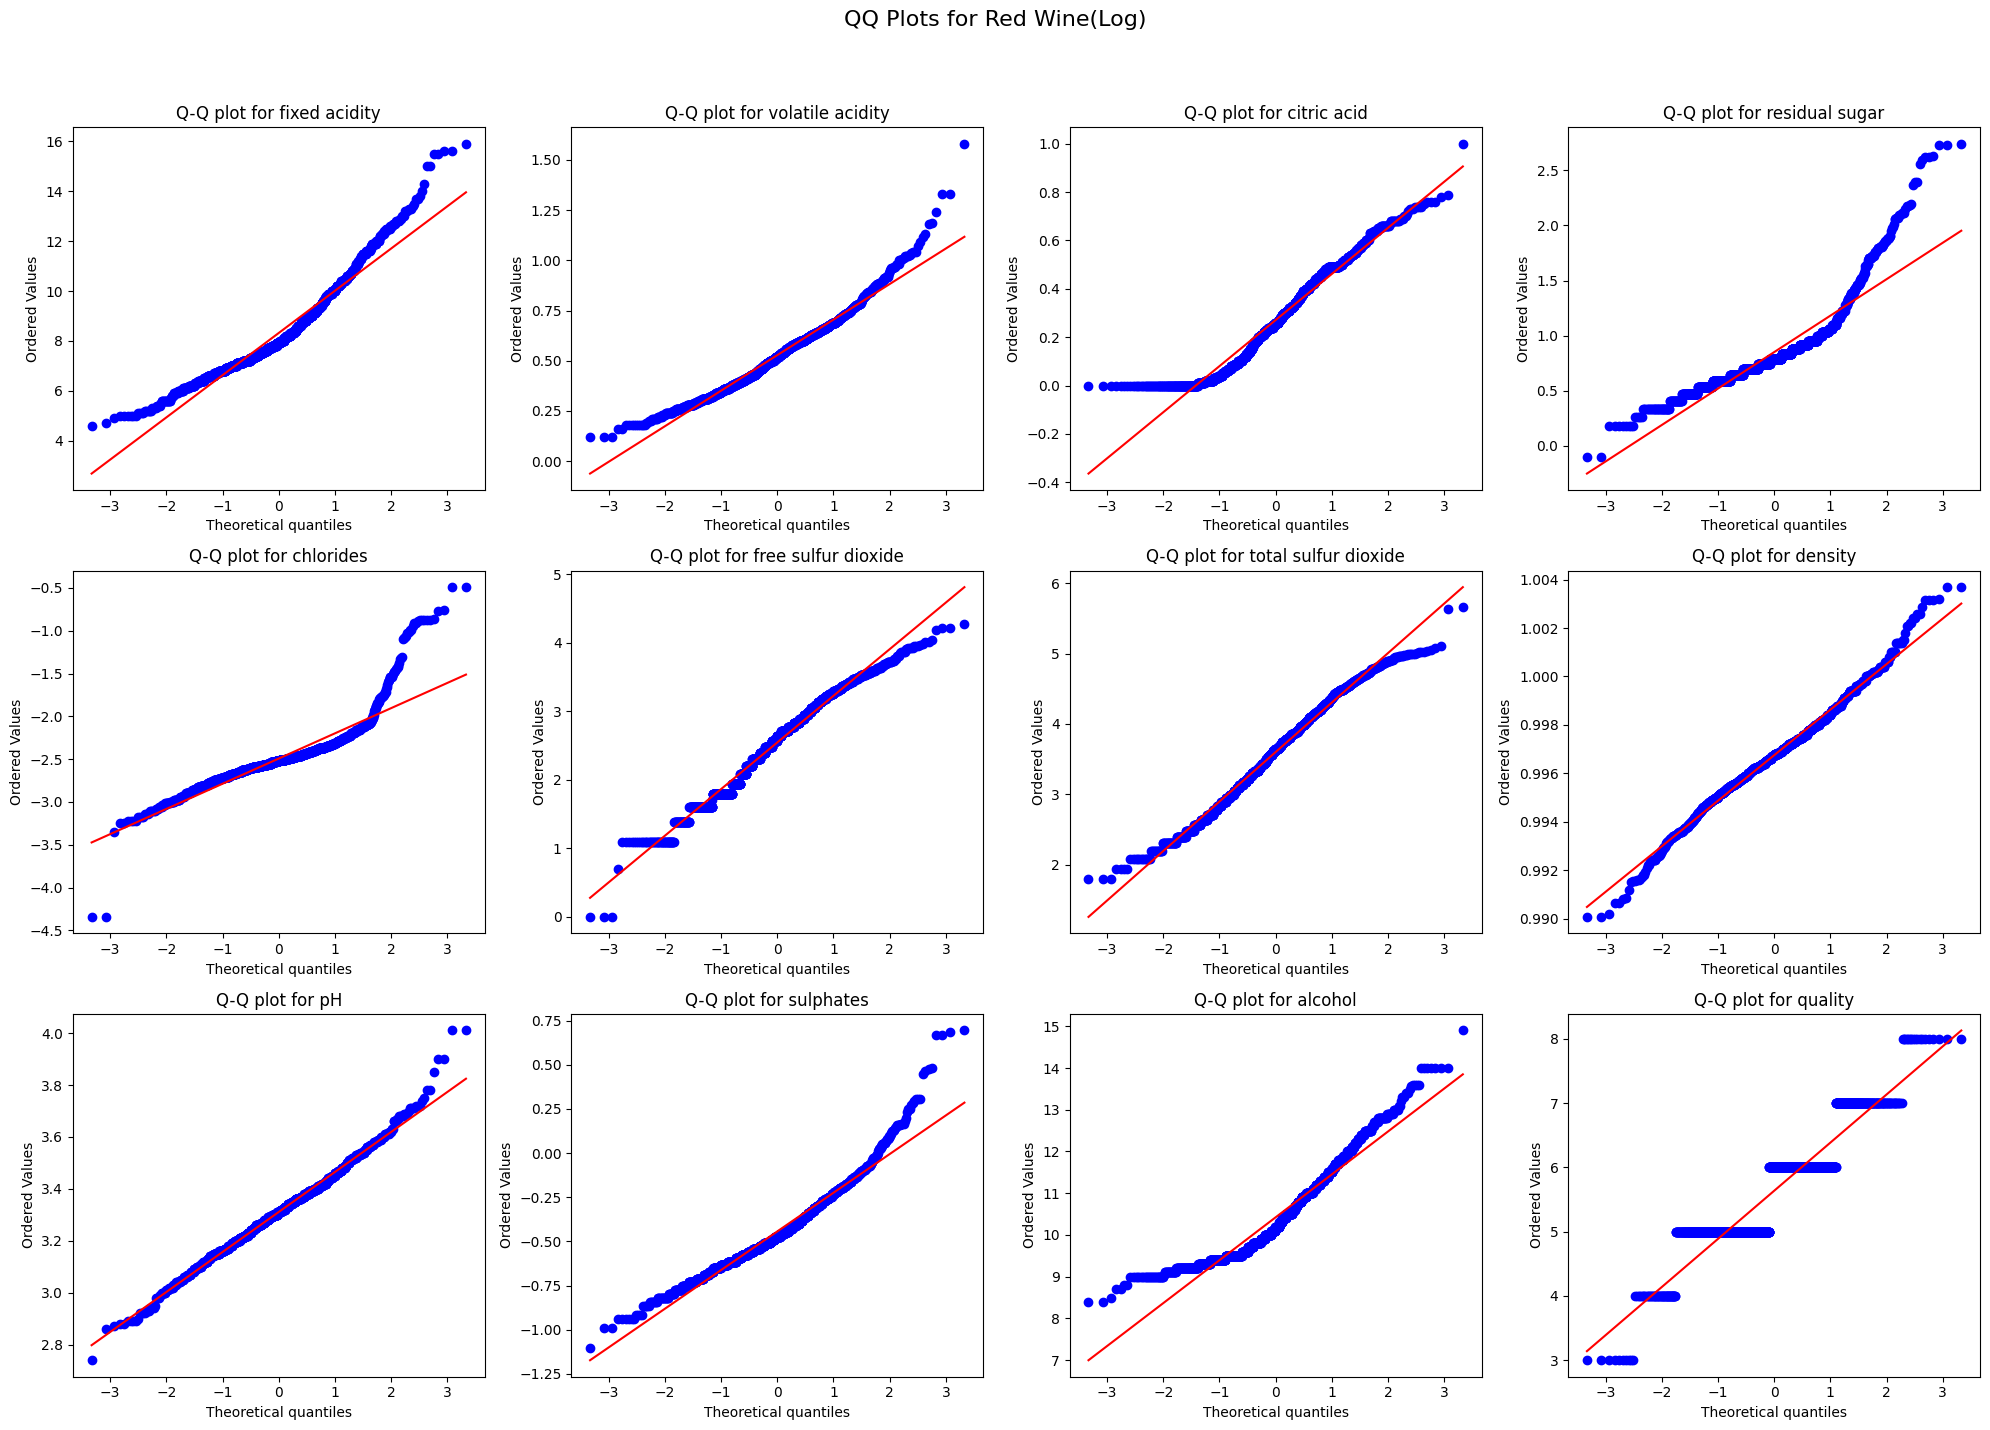

The skewness coefficient of Red Wine(Log):

fixed acidity: 0.98
volatile acidity: 0.67
citric acid: 0.32
residual sugar: 1.81
chlorides: 1.79
free sulfur dioxide: -0.23
total sulfur dioxide: -0.08
density: 0.07
pH: 0.19
sulphates: 0.92
alcohol: 0.86
quality: 0.22


In [48]:
create_qq_plot(log_red_wine_df)
calculate_skewness_coefficient(log_red_wine_df)

Observations:


Create heatmaps to understant the relationship between features and wine quality score.

In [23]:
def create_heat_map(wine_type_df):
       correlation_matrix = wine_type_df.corr()
       plt.figure(figsize=(15, 10))
       sns.heatmap(correlation_matrix, annot=True, cmap='seismic',linewidths=.5, vmax=1, vmin=-1)

       plt.title(f'Correlation matrix for {get_wine_str(wine_type_df)}')
       plt.xticks(rotation=45)
       plt.yticks(rotation=45)
       plt.show()

def create_clustermap(wine_type_df):
       correlation_matrix = wine_type_df.corr()
       plt.figure(figsize=(15, 15))
       sns.clustermap(correlation_matrix, annot=True, cmap='seismic',linewidths=.5, vmax=1, vmin=-1)

       plt.title(f'Correlation matrix for {get_wine_str(wine_type_df)}')
       plt.xticks(rotation=45)
       plt.yticks(rotation=45)
       plt.show()


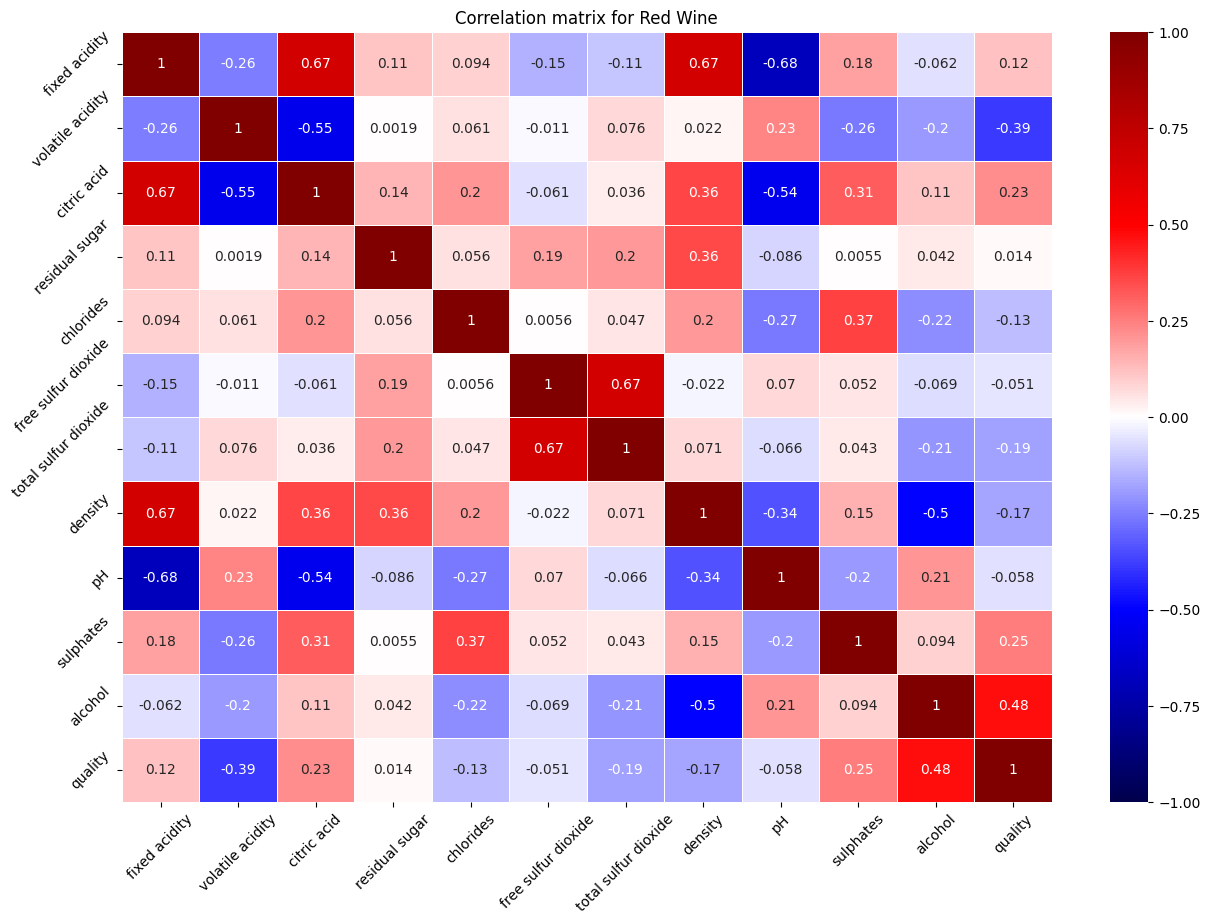

In [24]:
create_heat_map(df_red_wine)

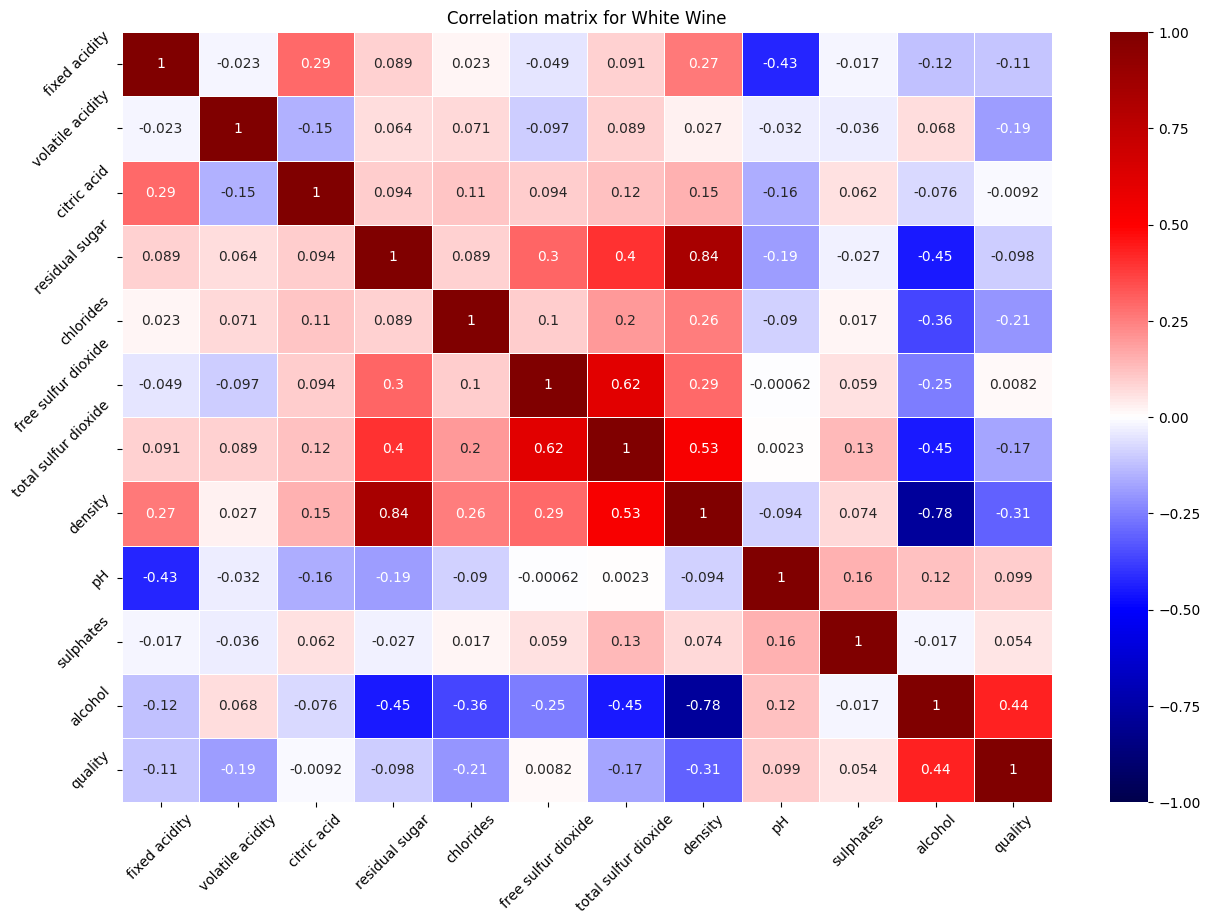

In [25]:
create_heat_map(df_white_wine)

**Observations from the heatmap**

1. **White Wine**:
   - Alcohol and Quality(0.44): Alcohol may enhance quality.
   - Density and Quality(-0.31): Density may decrease quality.
2. **Red Wine**:
   - Alcohol and Quality(0.48): Alcohol may enhance quality.
   - Volatile Acidity and Quality(-0.39): Volatile Acidity may decrease quality.
   - Sulphates and Quality(0.25): Sulphates may inhance quality.
3. **Conclusion**:
   - While both wine models will focus on alcohol,they may differ from specific features.

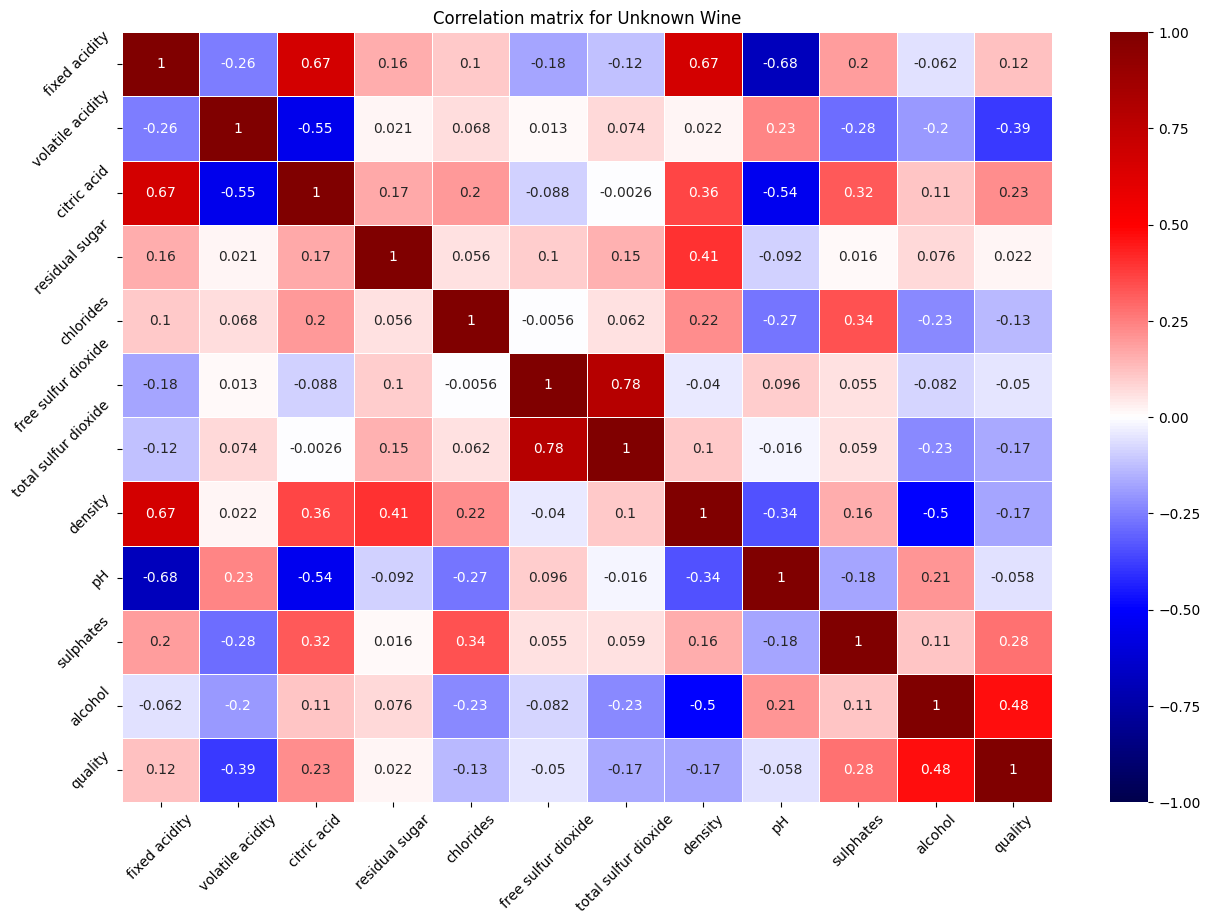

In [29]:
create_heat_map(log_red_wine_df)

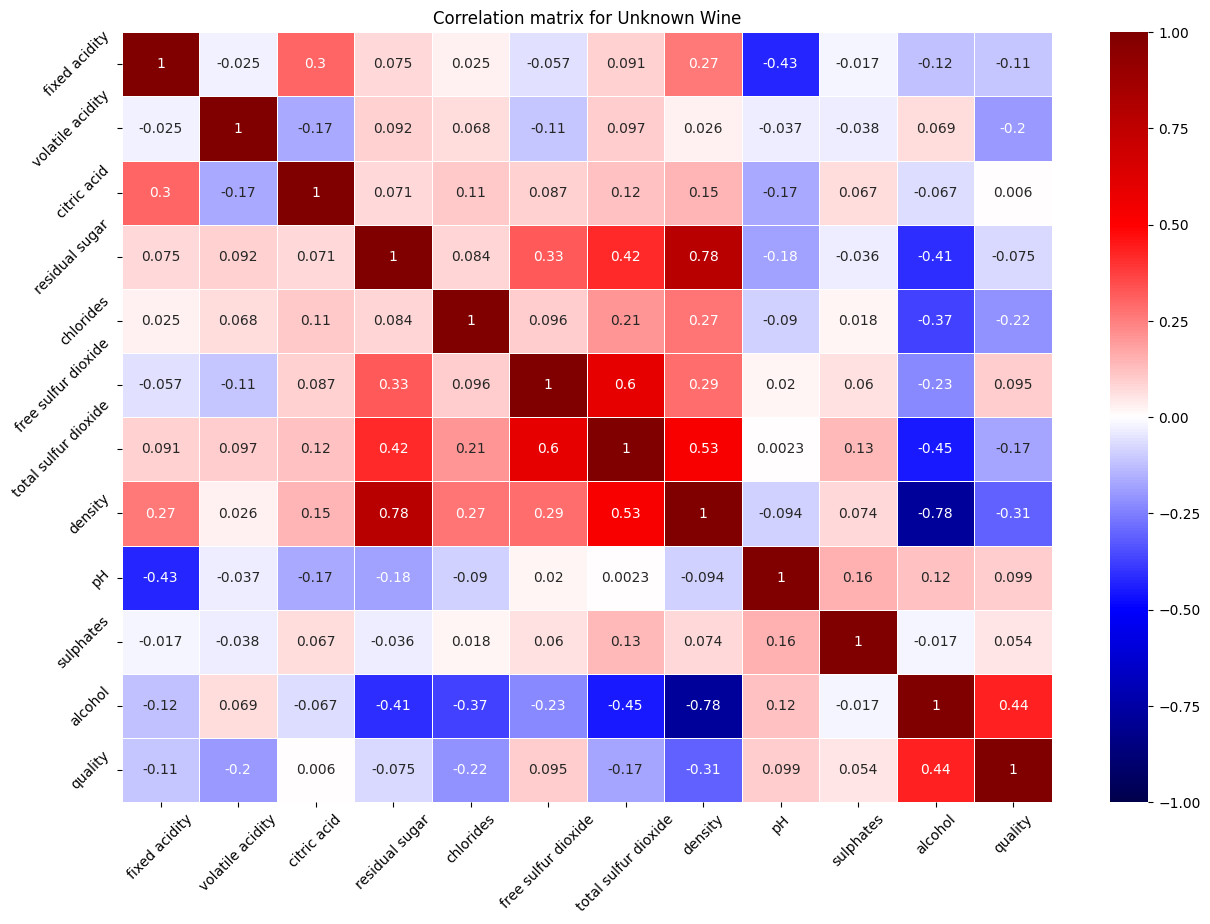

In [30]:
create_heat_map(log_white_wine_df)

**Observations from heatmap(using log transformation on certain columns)**

1. **White Wine**:

2. **Red Wine**:

3. **Conclusion**:


### Clustermaps
observe relationships between features

<Figure size 1500x1500 with 0 Axes>

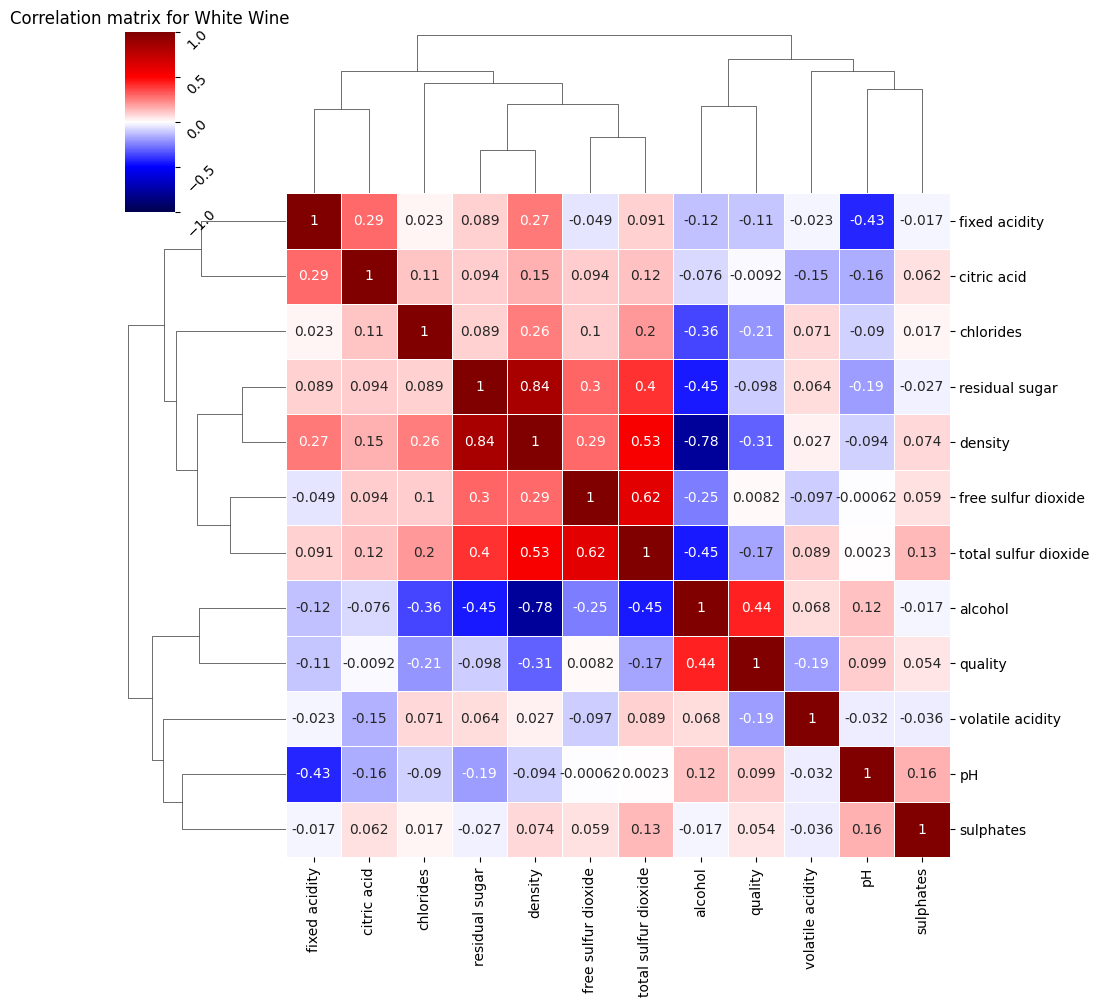

In [31]:
create_clustermap(df_white_wine)

<Figure size 1500x1500 with 0 Axes>

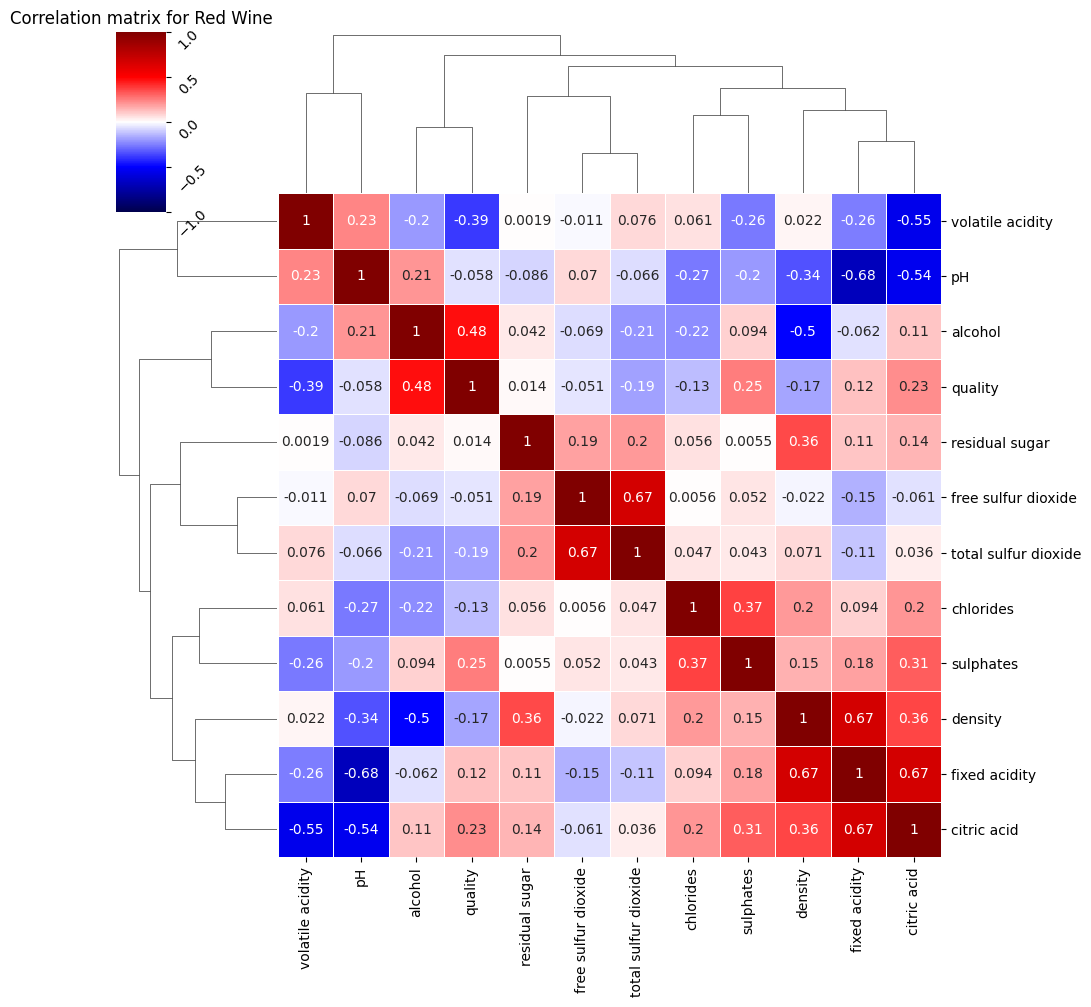

In [32]:
create_clustermap(df_red_wine)

<Figure size 1500x1500 with 0 Axes>

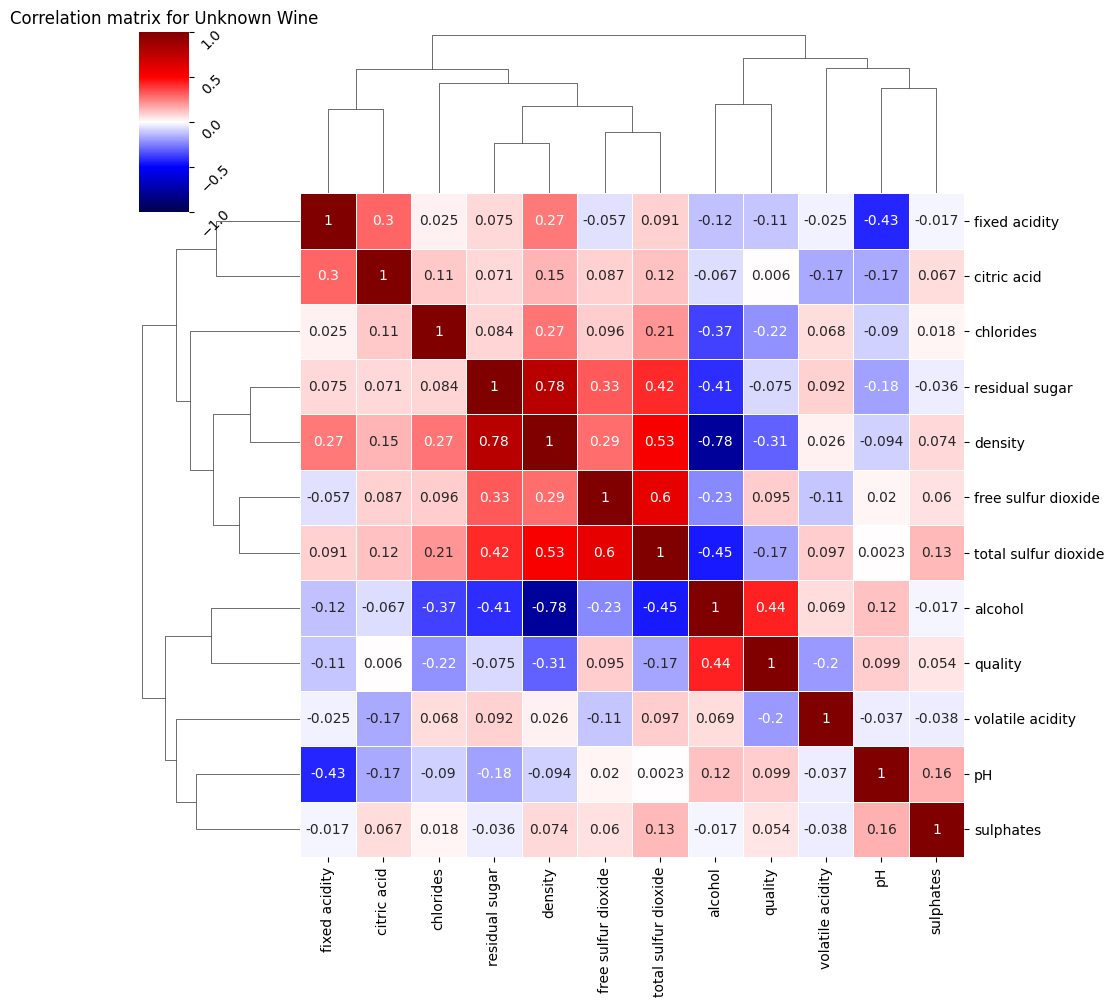

In [33]:
                    create_clustermap(log_white_wine_df)

<Figure size 1500x1500 with 0 Axes>

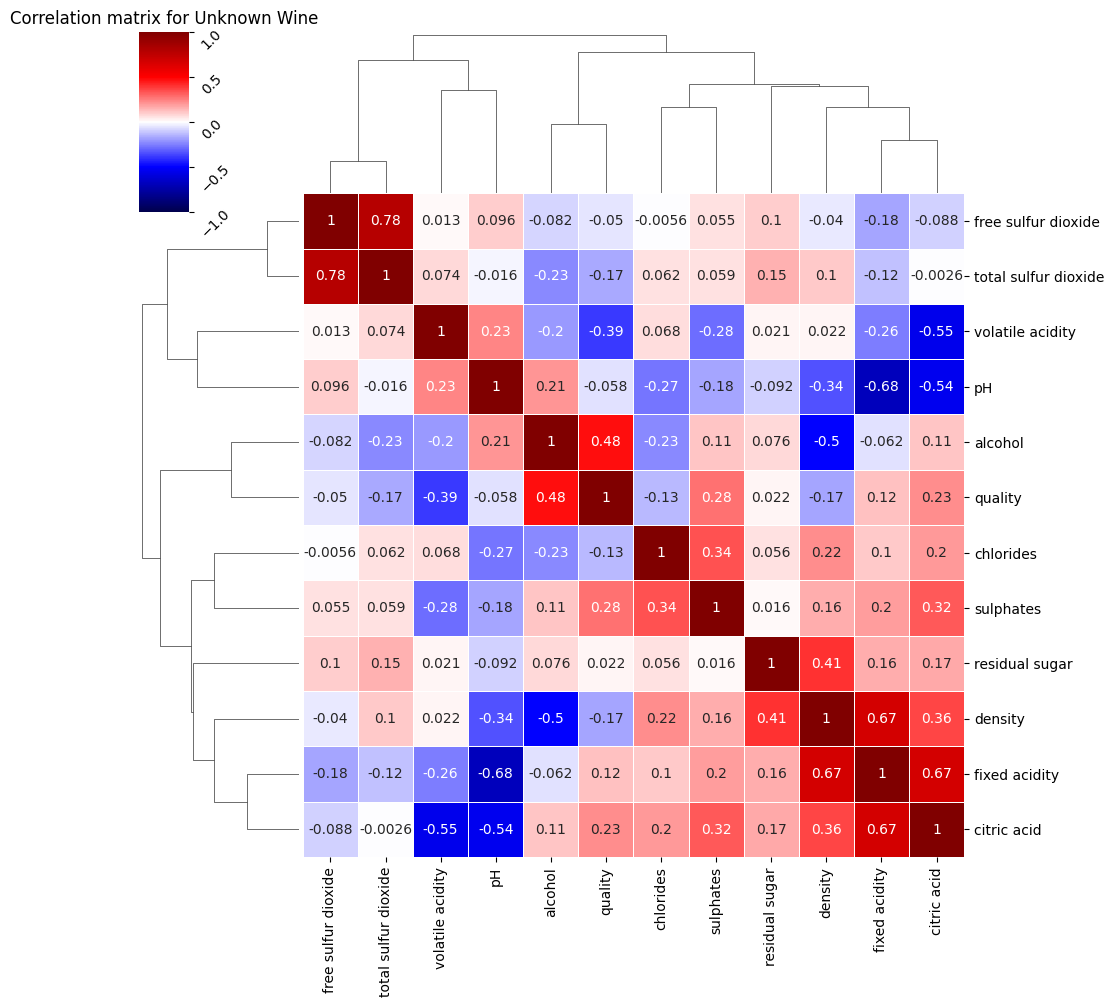

In [34]:
create_clustermap(log_red_wine_df)

**Conclusions from the clustermaps**

- Features that have high correlation between each other but low correlation with *quality* can be used to reduced dementions of our data  (We can use PCA to identyfe as many features we need)

### Selecting the most importnat features for **quality** prediction using top K features 

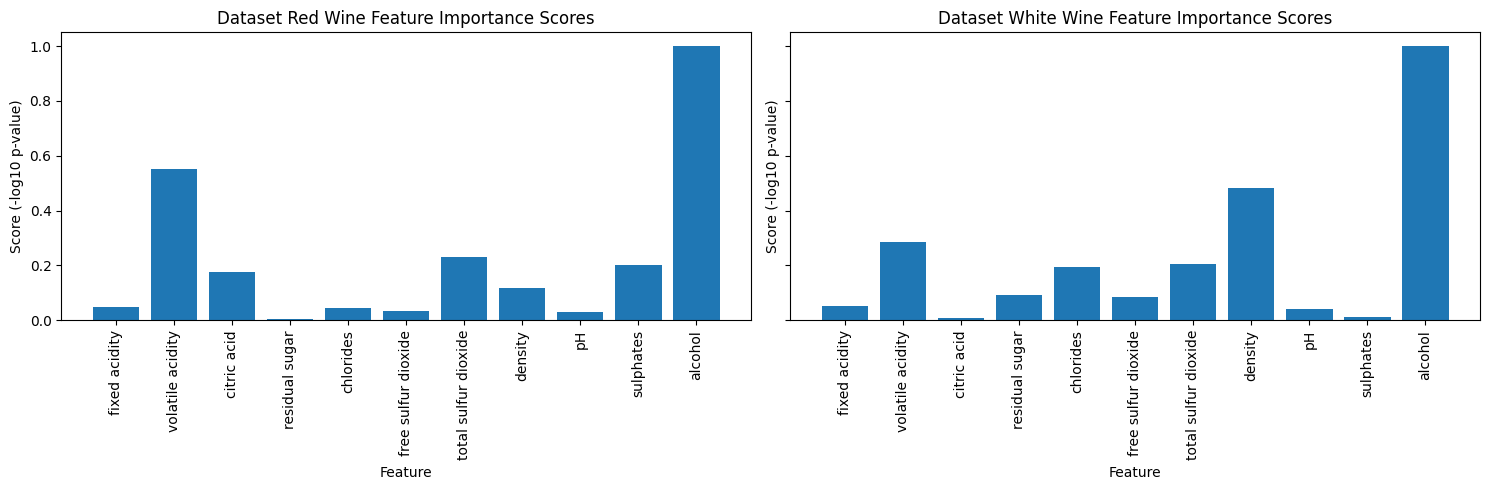

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

def visualize_feature_importance(datasets, names, k=5):
    num_datasets = len(datasets)

    # Create subplots
    fig, axes = plt.subplots(1, num_datasets, figsize=(15, 5), sharey=True)

    for i, (X, y) in enumerate(datasets):
        selector = SelectKBest(score_func=f_classif, k=k)
        X_new = selector.fit_transform(X, y)

        # Visualize the scores of features
        scores = -np.log10(selector.pvalues_)
        scores /= scores.max()

        # Plotting the bar plot for each dataset
        axes[i].bar(range(X.shape[1]), scores, tick_label=X.columns.values.tolist())
        axes[i].set_xticks(range(X.shape[1]))
        axes[i].set_xticklabels(X.columns.values.tolist(), rotation=90)
        axes[i].set_xlabel('Feature')
        axes[i].set_ylabel('Score (-log10 p-value)')
        axes[i].set_title(f'Dataset {names[i]} Feature Importance Scores')

    plt.tight_layout()
    plt.show()

# Example usage with two datasets (red wine and white wine)
datasets = [
    (df_red_wine.drop(columns=['quality']), df_red_wine['quality']),
    (df_white_wine.drop(columns=['quality']), df_white_wine['quality'])
]

visualize_feature_importance(datasets, ['Red Wine', 'White Wine'], k=5)


## Visualize Data

1) Quality distribiution based on the wine type (color)

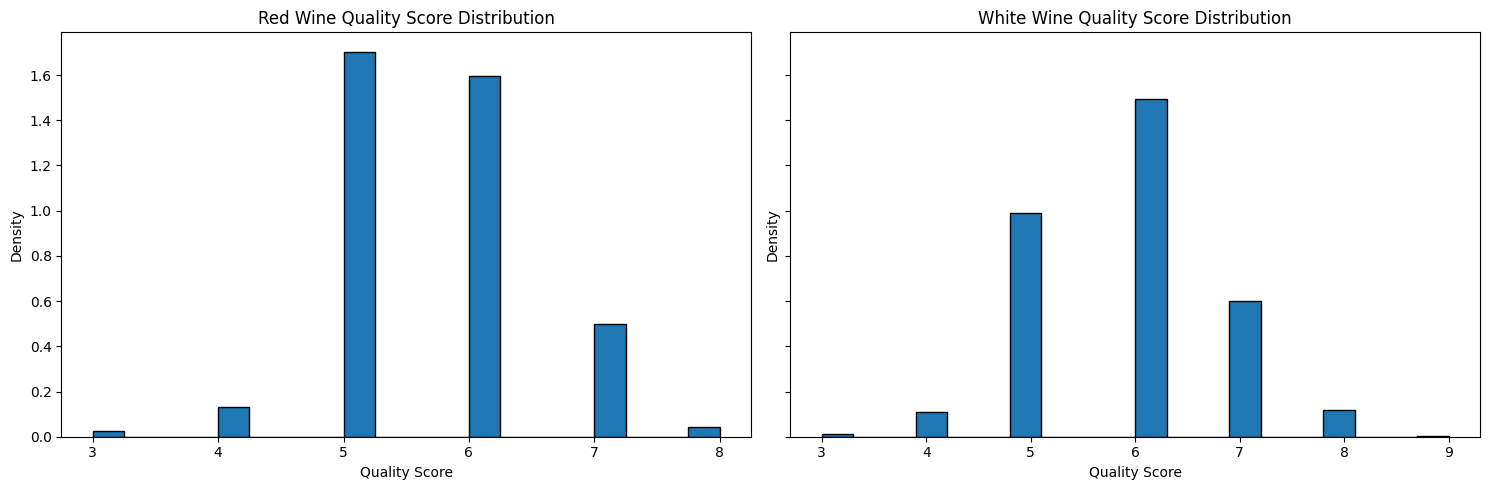

In [36]:
def visualize_quality_histogram(datasets):
    num_datasets = len(datasets)

    # Create subplots
    fig, axes = plt.subplots(1, num_datasets, figsize=(15, 5), sharey=True)

    for i, (df, name) in enumerate(datasets):
        quality_column = df['quality']
        axes[i].hist(quality_column, bins=20, edgecolor='black', density = True)
        axes[i].set_xlabel('Quality Score')
        axes[i].set_ylabel('Density')
        axes[i].set_title(f'{name} Quality Score Distribution')

    plt.tight_layout()
    plt.show()

# Example usage with two datasets (red wine and white wine)
datasets = [
    (df_red_wine, 'Red Wine'),
    (df_white_wine, 'White Wine')
]

visualize_quality_histogram(datasets)


## Significant Statement

## Conclusion & Discussions